In [2]:
from pyforest import *
lazy_imports()

['from sklearn.decomposition import PCA',
 'import datetime as dt',
 'import lightgbm as lgb',
 'import xgboost as xgb',
 'from sklearn.linear_model import LogisticRegression',
 'import fbprophet',
 'import pydot',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.ensemble import RandomForestRegressor',
 'import awswrangler as wr',
 'from scipy import stats',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import pandas as pd',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.cluster import KMeans',
 'import nltk',
 'import seaborn as sns',
 'import tqdm',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.manifold import TSNE',
 'import glob',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import cv2',
 'import dash',
 'import statistics',
 'from sklearn.model_selection import StratifiedKFold',
 'fro

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_data = pd.read_csv('bigmart_train.csv')
test_data = pd.read_csv('bigmart_test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Explore the data

In [8]:
train_data.shape, test_data.shape

((8523, 12), (5681, 11))

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [18]:
train_data.isnull().sum() , "  " ,test_data.isnull().sum()

(Item_Identifier                 0
 Item_Weight                  1463
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 dtype: int64,
 '  ',
 Item_Identifier                 0
 Item_Weight                   976
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 dtype: int64)

In [19]:
train_data['source'] = "train"
test_data['source'] = "test"
df = pd.concat([train_data, test_data], ignore_index=True)
df.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


<IPython.core.display.Javascript object>

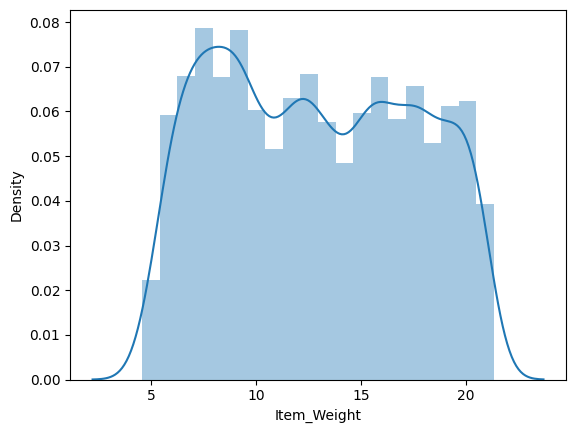

<IPython.core.display.Javascript object>

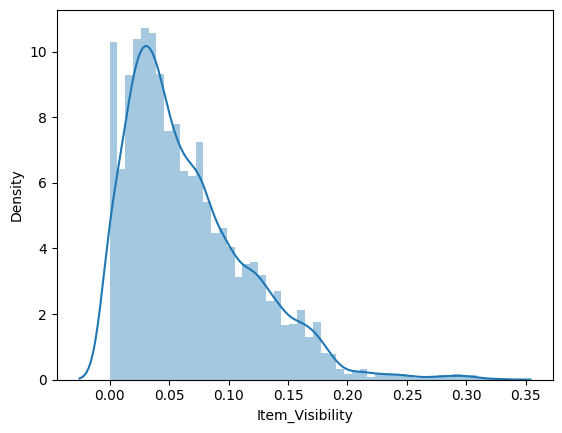

<IPython.core.display.Javascript object>

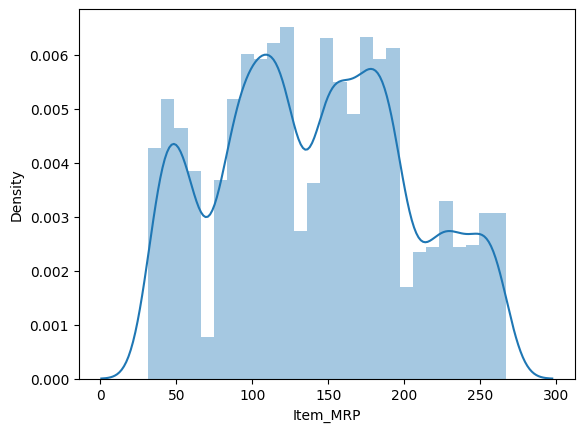

<IPython.core.display.Javascript object>

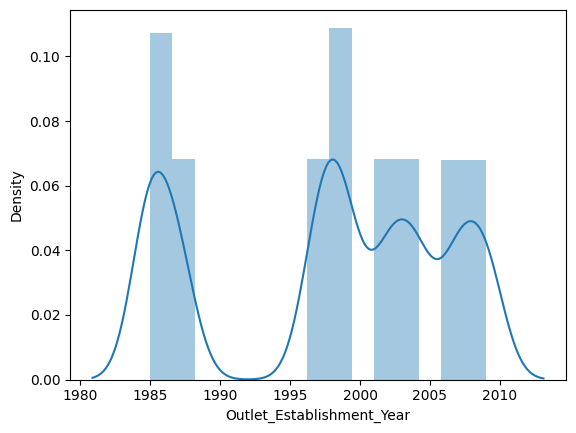

<IPython.core.display.Javascript object>

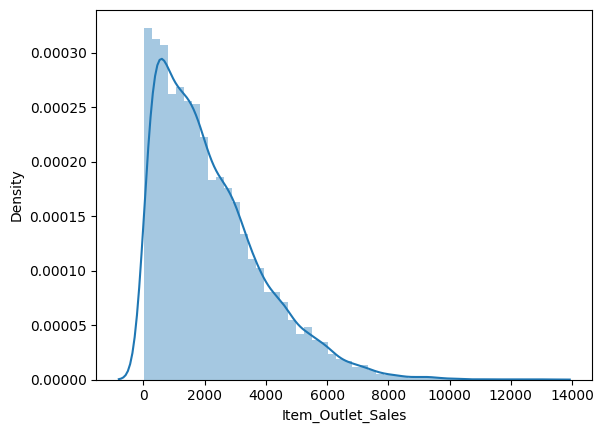

In [26]:
import seaborn as sns
for col in train_data.describe().columns:
    sns.distplot(train_data[col])
    plt.show()

<IPython.core.display.Javascript object>

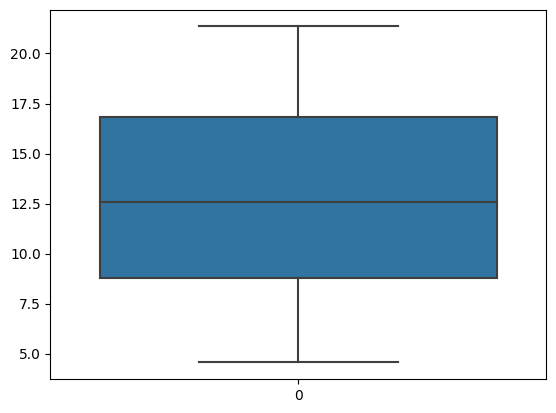

<IPython.core.display.Javascript object>

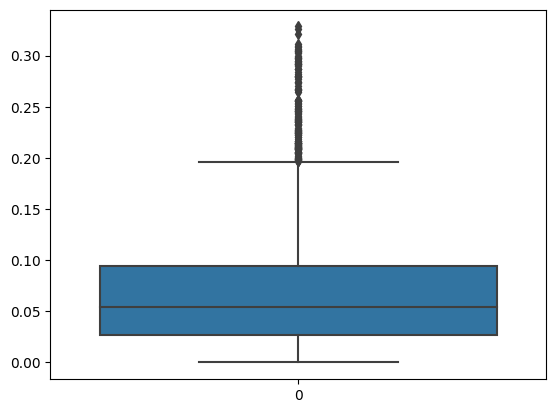

<IPython.core.display.Javascript object>

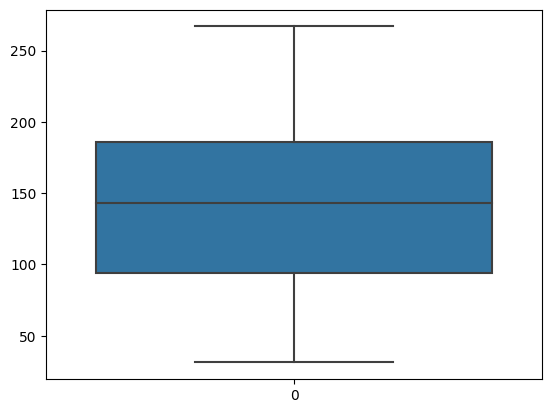

<IPython.core.display.Javascript object>

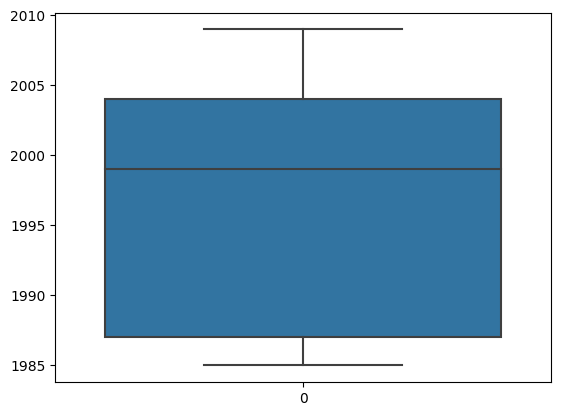

<IPython.core.display.Javascript object>

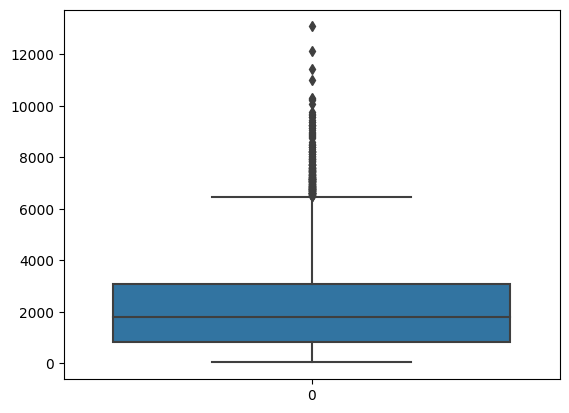

In [28]:
for col in train_data.describe().columns:
    sns.boxplot(train_data[col].dropna())
    plt.show()

In [29]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

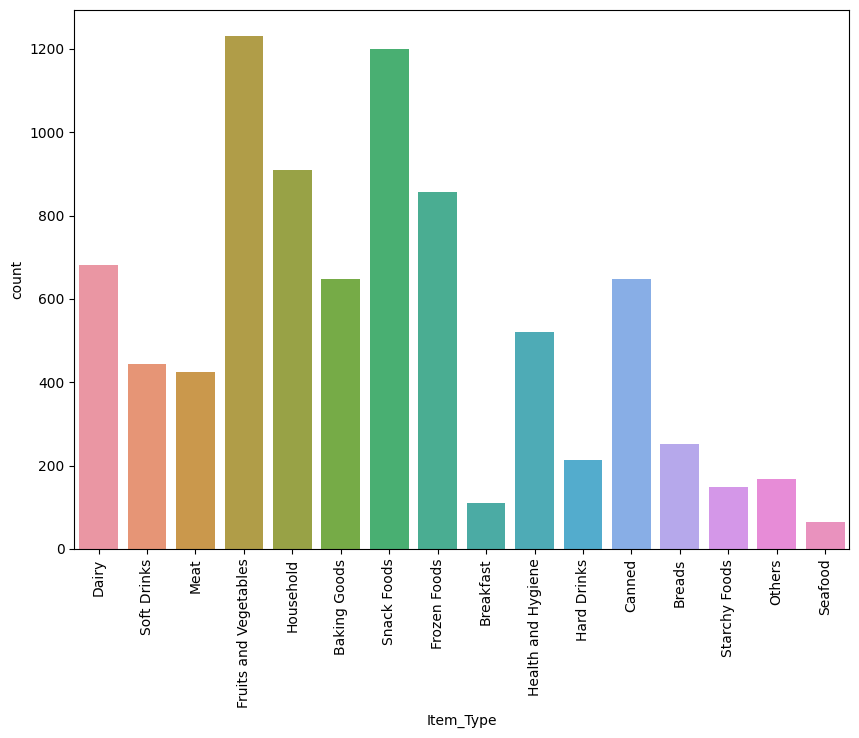

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(data = train_data, x="Item_Type")
plt.xticks(rotation=90)

In [42]:
train_data.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

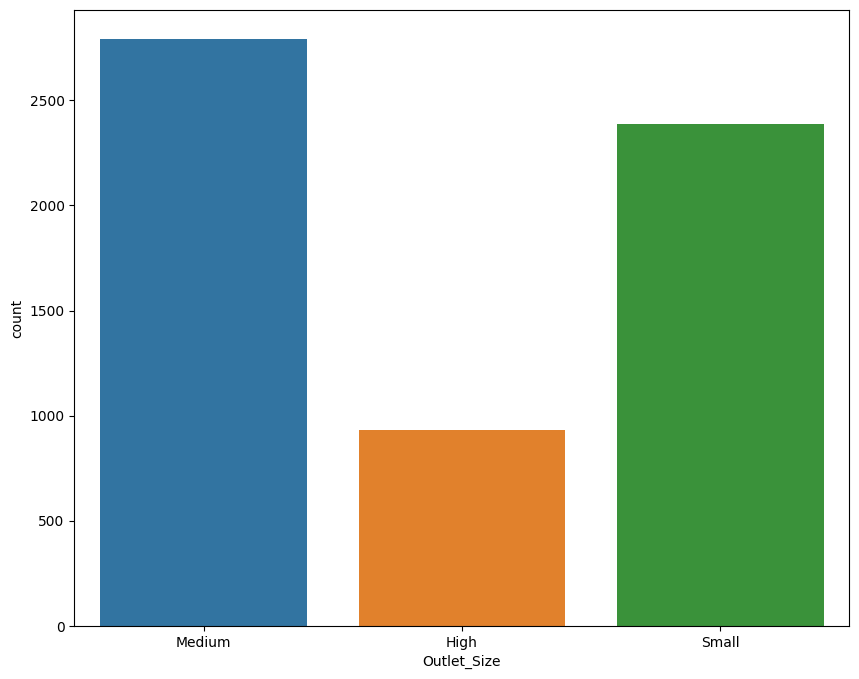

In [43]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Outlet_Size', data=train_data)
plt.show()

In [44]:
train_data.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

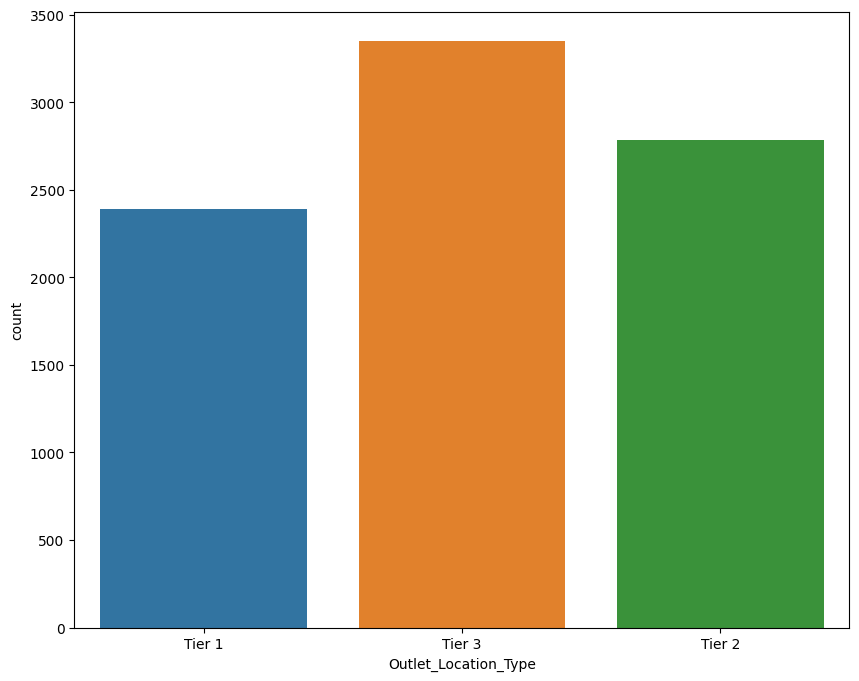

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(x='Outlet_Location_Type', data = train_data)
plt.show()

In [47]:
train_data.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

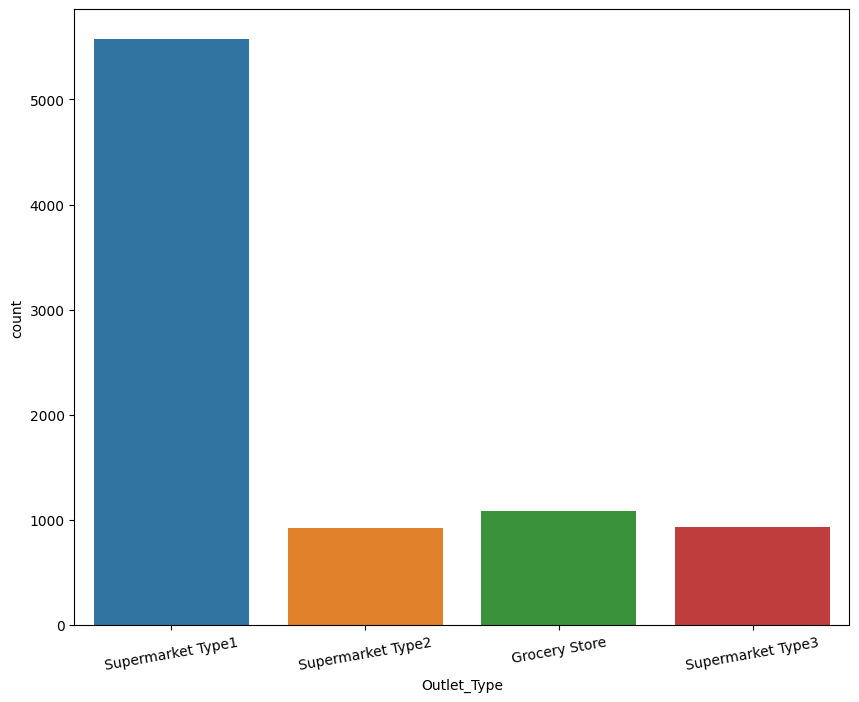

In [48]:
plt.figure(figsize=(10,8))
sns.countplot(x='Outlet_Type', data=train_data)
plt.xticks(rotation=10)

In [49]:
train_data.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

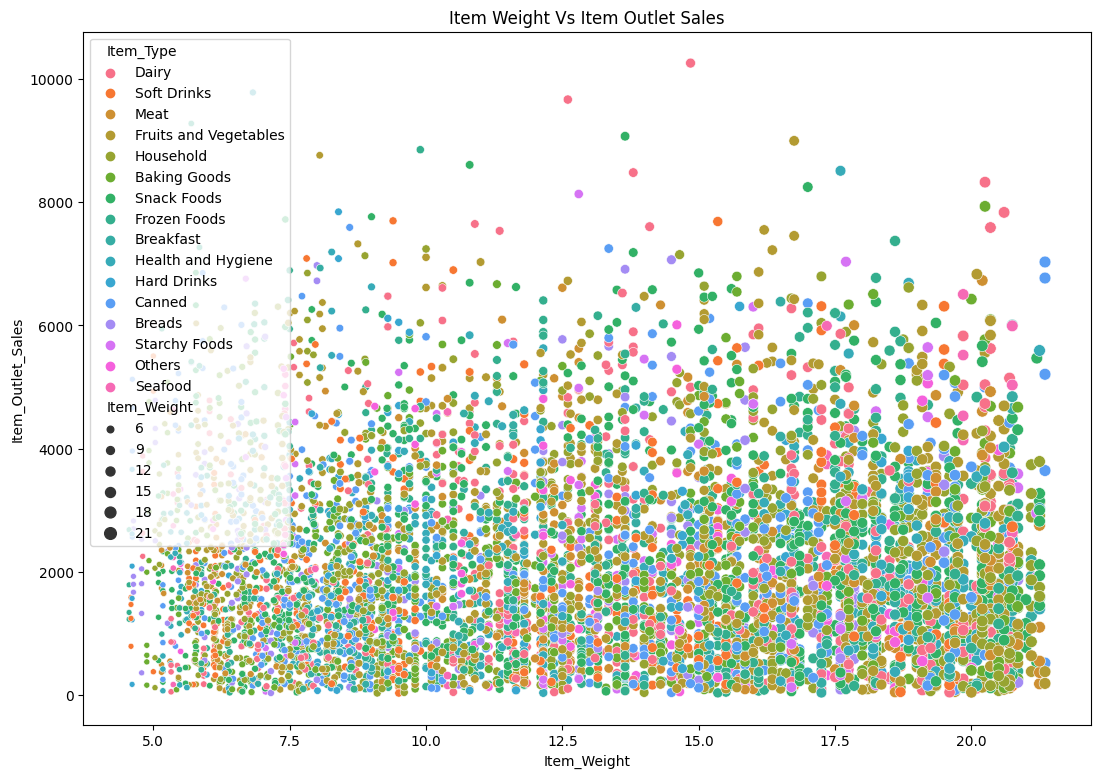

In [53]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel(('Item_Outlet_Sales'))
plt.title('Item Weight Vs Item Outlet Sales')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight', data=train_data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

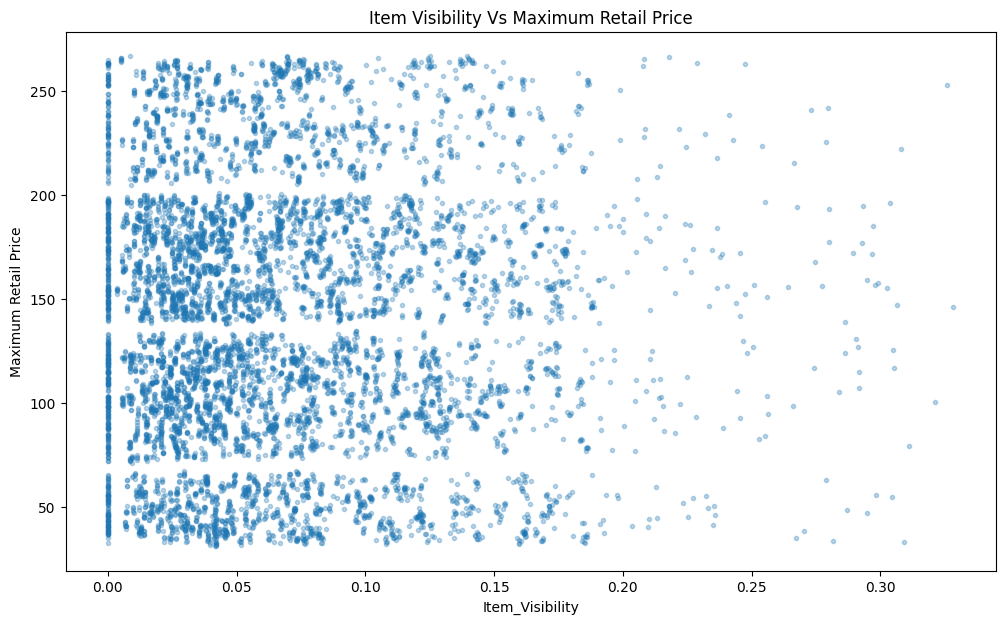

In [52]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item Visibility Vs Maximum Retail Price')
plt.plot(train_data.Item_Visibility, train_data.Item_MRP, '.', alpha=0.3)

In [54]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

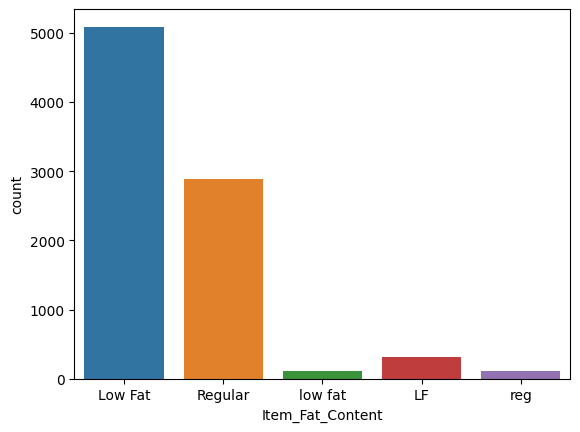

In [55]:
sns.countplot(x='Item_Fat_Content',data=train_data)

In [56]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

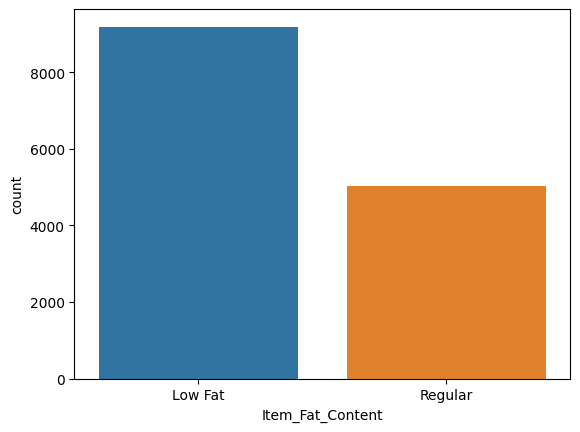

In [58]:
sns.countplot(data = df, x ='Item_Fat_Content')

In [59]:
train_data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [60]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
train_data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

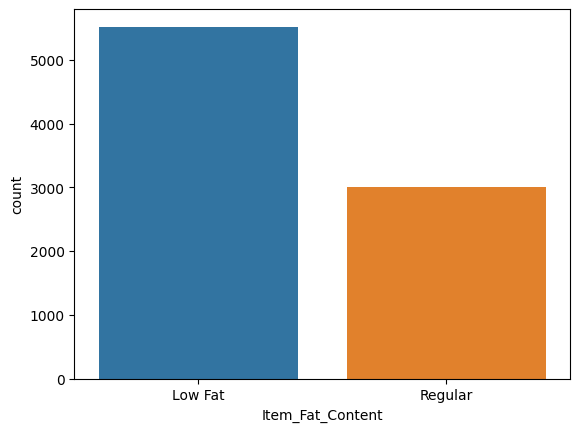

In [61]:
sns.countplot(data=train_data, x='Item_Fat_Content')

In [70]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [71]:
train_corr = train_data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year', 'Item_Outlet_Sales']]
train_corr.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [72]:
train_corr.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

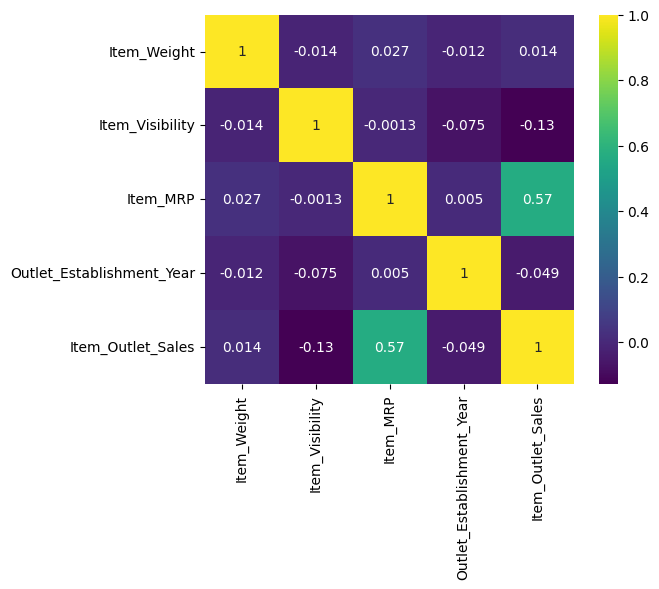

In [74]:
sns.heatmap(train_corr.corr(), vmax=1, square=True, annot=True, cmap='viridis')

### Feature Engineering

#### fill the missing values

In [79]:
df.Item_Weight.mean()

12.792854228644284

In [80]:
df.Item_Weight.fillna(df.Item_Weight.mean(), inplace=True)

In [83]:
df.Outlet_Size.value_counts()

Outlet_Size
Medium    8671
Small     3980
High      1553
Name: count, dtype: int64

In [82]:
df.Outlet_Size.fillna('Medium',inplace=True)

In [85]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64